## Lois normales tronquées


Soit le vecteur aléatoire $X = (X_1,\dots,X_d) \sim \mathcal{N}_d(\mu,\Sigma)$, de densité noté $g(x) = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} e^{-\frac{1}{2} (x-\mu)' \Sigma^{-1} (x-\mu)}$ et de fonction de répartition noté $G$, définies sur $\mathbb{R}$. 
Soient $\mu \in \mathbb{R}^d$ et $\Sigma \in \mathcal{M}_{d\times d}(\mathbb{R})$ symétrique et semi-définie positive.

$X > 0$ signifie que l'inégalité est effectuée composante par composante : $X_1 > 0 \: et \: \dots \: et \: X_d > 0$.

La loi normale de paramètre $\mu, \Sigma$ tronquée à $]0,+\infty[$, notée $\mathcal{N}_{>0,d}(\mu,\Sigma)$, est la loi du vecteur aléatoire $X|X>0$.

In [1]:
import numpy as np
import numpy.random as npr
import scipy.stats as st
import matplotlib.pyplot as plt

### Question 1

Soit $f$ la densité de $X|X>0$ et soit $F$ sa fonction de répartition, continue sur $\mathbb{R}$ privé d'un ensemble Lebesgue-négligeable.

$\forall x \in ]0,+\infty[^d$ :

$$
F(x)
= \mathbb{P}(X \leq x | X > 0) 
= \frac{\mathbb{P}(X \leq x , X > 0)}{\mathbb{P}(X > 0)} 
= \frac{G(x) - G(0)}{1 - G(0)}
$$

$$
f(x) 
= F'(x) 
= \frac{G'(x)}{1 - G(0)}
= \frac{g(x)}{1 - G(0)}
= Z(\mu,\Sigma) g(x) 
$$

avec $$ Z(\mu,\Sigma) = (1 - G(0))^{-1} =  \left( \int_{]0,+\infty[^d} \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} e^{-\frac{1}{2} (x-\mu)' \Sigma^{-1} (x-\mu)} dx  \right)^{-1} $$
correspondant à l'inverse d'une intégrale difficile à calculer.

Donc la densité $f$ de la loi $\mathcal{N}_{>0,d}(\mu,\Sigma)$ est :
$$
f(x) = \frac{g(x)}{ \int_{]0,+\infty[^d} g(x) dx} \mathbb{1}_{]0,+\infty[^d}(x)
$$

Généralisation de la troncature :




- $a \in \mathbb{R}^d$ , soient f et F la densité et la fonction de répartition de $X|X>a$

$\forall x \in ]a,+\infty[^d$
 
$$
F(x)
= \mathbb{P}(X \leq x | X > a) 
= \frac{\mathbb{P}(X \leq x , X > a)}{\mathbb{P}(X > a)} 
= \frac{G(x) - G(a)}{1 - G(a)}
$$

$$
f(x) 
= F'(x) 
= \frac{G'(x)}{1 - G(a)}
= \frac{g(x)}{1 - G(a)}
= Z(\mu,\Sigma,a) g(x) 
$$

avec $$ Z(\mu,\Sigma,a) = (1 - G(a))^{-1} =  \left( \int_{]a,+\infty[^d} \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} e^{-\frac{1}{2} (x-\mu)' \Sigma^{-1} (x-\mu)}  \right)^{-1} $$

Donc la densité $f$ de la loi $\mathcal{N}_{>a,d}(\mu,\Sigma)$ est :
$$
f(x) = \frac{g(x)}{ \int_{]a,+\infty[^d} g(x) dx} \mathbb{1}_{]a,+\infty[^d}(x)
$$




- $b \in \mathbb{R}^d$ , soit f et F la densité et la fonction de répartition de $X|X<b$

 $\forall x \in ]-\infty,b[^d$
 
$$
F(x)
= \mathbb{P}(X \leq x | X < b) 
= \frac{\mathbb{P}(X \leq x, X < b)}{\mathbb{P}(X < b)} 
= \frac{\mathbb{P}(X \leq x)}{\mathbb{P}(X < b)} 
= \frac{G(x)}{G(b)}
$$

$$
f(x) 
= F'(x) 
= \frac{G'(x)}{G(b)}
= \frac{g(x)}{G(b)}
= Z(\mu,\Sigma,b) g(x) 
$$

avec $$ Z(\mu,\Sigma,b) = G(b)^{-1} =  \left( \int_{]-\infty,b[^d} \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} e^{-\frac{1}{2} (x-\mu)' \Sigma^{-1} (x-\mu)}  \right)^{-1} $$ 

Donc la densité $f$ de la loi $\mathcal{N}_{<b,d}(\mu,\Sigma)$ est :
$$
f(x) = \frac{g(x)}{ \int_{]-\infty,b[^d} g(x) dx} \mathbb{1}_{]-\infty,b[^d}(x)
$$



- $a,b \in \mathbb{R}^d$ , soit f et F la densité et la fonction de répartition de $X|a<X<b$

$\forall x \in ]a,b[^d$

$$
F(x)
= \mathbb{P}(X \leq x | a < X < b) 
= \frac{\mathbb{P}(X \leq x, a < X < b)}{\mathbb{P}(a < X < b)} 
= \frac{\mathbb{P}(a < X \leq x)}{\mathbb{P}(a < X < b)} 
= \frac{G(x) - G(a)}{G(b) - G(a)}
$$

$$
f(x) 
= G'(x) 
= \frac{G'(x)}{G(b) - G(a)}
= \frac{g(x)}{G(b) - G(a)}
= Z(\mu,\Sigma,a,b) g(x) 
$$

avec $$ Z(\mu,\Sigma,a,b) = (G(b) - G(a))^{-1} =  \left( \int_{]a,b[^d} \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} e^{-\frac{1}{2} (x-\mu)' \Sigma^{-1} (x-\mu)}  \right)^{-1} $$ 

Donc la densité $f$ de la loi $\mathcal{N}_{>a,<b,d}(\mu,\Sigma)$ est :
$$
f(x) = \frac{g(x)}{ \int_{]a,b[^d} g(x) dx} \mathbb{1}_{]a,b[^d}(x)
$$


---

### Question 2

On suppose $d=1$. On veut simuler par Acceptation-Rejet la loi $\mathcal{N}_{>0}(\mu,\sigma^2)$ de densité $f$.

- loi de proposition : $\mathcal{N}(\mu,\sigma)$ de densité $g$

Comme $ \frac{f(x)}{g(x)} = (1-F(0))^{-1} \mathbb{1}_{]0,+\infty[}(x) \leq (1-F(0))^{-1} =  (\mathbb{P}_X(X > 0))^{-1} = (\mathbb{P}_W(\mu + \sigma W > 0))^{-1} = (\mathbb{P}_W(W \leq \frac{\mu}{\sigma}))^{-1} = (\Phi(\frac{\mu}{\sigma}))^{-1} = M $

où $ W \sim \mathcal{N}(0,1)$ de fonction de répartition $\Phi$.


Ainsi on simule $f$ de la façon suivante :

1) on simule $Y \sim g$ ;

2) on simule $U \sim \mathcal{U}(]0,1[)$ ;

3) si $U \leq \frac{f(Y)}{Mg(Y)} = \mathbb{1}_{]0,+\infty[}(Y) $, alors $X \overset{loi}{=} Y \sim f$ ; sinon retour en 1)

In [2]:
#version naïve
def AR_g_V1(n,m,s):
    #n = nombre de simulations
    #m = paramètre moyenne de la loi de proposition g (et de la loi cible f)
    #s = paramètre écart-type de la loi de proposition g (et de la loi cible f)
    
    resultat = []
    g = st.norm(loc=m,scale=s) 
    while len(resultat) < n:
        Y = g.rvs(size=1)
        U = st.uniform.rvs(size=1)
        
        if (Y > 0):
            resultat.append(Y)
            
    return np.r_[tuple(resultat)]

        
#version améliorée
def AR_g_V2(n,m,s):
    #n = nombre de simulations
    #m = paramètre moyenne de la loi de proposition g (et de la loi cible f)
    #s = paramètre écart-type de la loi de proposition g (et de la loi cible f)
    
    resultat = []
    lresultat = 0
    proba_accepte = st.norm.cdf(m/s,loc=0,scale=1) #=1/M fonction repartion loi normal centrée réduite au point m/s
    g = st.norm(loc=m,scale=s) # densité loi normal en paramètres (m,s)
    while lresultat < n:
        missing = n - lresultat
        n_simu = int(missing / proba_accepte) 
        Y = g.rvs(size=n_simu) # simulation de g 
        U = st.uniform.rvs(size=n_simu)
        
        accepte = Y > 0
        if sum(accepte) > 0:
            resultat.append(Y[accepte])
        lresultat += sum(accepte)
        
    return np.r_[tuple(resultat)][0:(n-1)]
        
        
#faire une version generale pour chaque troncature ?

On remarque que pour $\mu > 0$, la probabilité d'acceptation vérifie $\frac{1}{M} = \Phi(\frac{\mu}{\sigma}) > 0.5$. La probabilité d'acceptation $\frac{1}{M}$ est d'autant plus grande lorsque $\mu >> 0$. On préférera donc cette loi de proposition pour $\mu >0$.

In [5]:
n = 10000 #nombre de valeurs à simuler
m = 1 #mu
s = np.sqrt(2) #sigma
AR_g_V2(n,m,s)

array([1.31062691, 2.62939456, 1.14764121, ..., 0.22635792, 2.78382166,
       0.78707906])

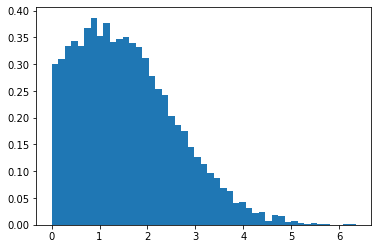

In [4]:
plt.hist(AR_g_V2(n,m,s), density=True, bins="auto")
plt.show()

- loi de proposition : $\mathcal{E}(\lambda)$, $\lambda > 0$, de densité $h(x) = \lambda e^{- \lambda x} \mathbb{1}_{]0,+\infty[}(x) $ 

$$\forall x>0, \;\; \frac{f(x)}{h(x)} 
= \frac{g(x)}{\Phi(\frac{\mu}{\sigma})h(x)} 
= \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma} \frac{e^{-\frac{1}{2\sigma^2}(x-\mu)^2}}{\lambda e^{-\lambda x}} 
= \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda} e^{-\frac{1}{2\sigma^2}(x-\mu)^2 + \lambda x} 
= \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda} e^{-\frac{1}{2\sigma^2} ((x-\mu)^2 + 2 \sigma^2 \lambda x) } $$

Soit 
\begin{align*}
P(x) & = (x-\mu)^2 + 2 \sigma^2 \lambda x  \\
& = x^2 - 2 \mu x + \mu^2 + 2 \sigma^2 \lambda x \\
& = x^2 - 2 x (\mu + \sigma^2 \lambda) + \mu^2 \\
& = x^2 - 2 x (\mu + \sigma^2 \lambda) + (\mu + \sigma^2 \lambda)^2 + \mu^2 - (\mu + \sigma^2 \lambda)^2 \\
& = ( x - (\mu + \sigma^2 \lambda) )^2 + \mu^2 - \mu^2 - 2 \mu \sigma^2 \lambda - \sigma^4 \lambda^2 \\
& = ( x - (\mu + \sigma^2 \lambda) )^2 - 2 \sigma^2 (\mu \lambda + \frac{\lambda^2 \sigma^2}{2})
\end{align*}

D'où 
$$\forall x>0, \;\; \frac{f(x)}{h(x)} 
= \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda} e^{-\frac{1}{2\sigma^2} P(x) }
= \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda} e^{-\frac{1}{2\sigma^2} ( x - (\mu + \sigma^2 \lambda) )^2} e^{\mu \lambda + \frac{\lambda^2 \sigma^2}{2}}
$$

On cherche à majorer ce quotient en $x>0$.
$x \mapsto \frac{f(x)}{h(x)}$ est maximum lorsque $x \mapsto e^{-\frac{1}{2\sigma^2} ( x - (\mu + \sigma^2 \lambda) )^2}$ atteint son maximum, c'est-à-dire lorsque $x \mapsto ( x - (\mu + \sigma^2 \lambda) )^2$ atteint son minimum : il est atteint en $x = \mu + \lambda \sigma^2$ si $\mu + \lambda \sigma^2 > 0$, sinon il est atteint en $x = 0$.

En d'autres termes : 

pour $\mu + \lambda \sigma^2 > 0$, $\underset{x > 0}{\text{argmax}} \frac{f(x)}{h(x)} = \underset{x > 0}{\text{argmax}} e^{-\frac{1}{2\sigma^2} ( x - (\mu + \sigma^2 \lambda) )^2} = \underset{x > 0}{\text{argmin}} ( x - (\mu + \sigma^2 \lambda) )^2 = \mu + \lambda \sigma^2$ ;

pour $\mu + \lambda \sigma^2 < 0$, $\underset{x > 0}{\text{argmax}} \frac{f(x)}{h(x)} = \underset{x > 0}{\text{argmax}} e^{-\frac{1}{2\sigma^2} ( x - (\mu + \sigma^2 \lambda) )^2} = \underset{x > 0}{\text{argmin}} ( x - (\mu + \sigma^2 \lambda) )^2 = 0 $

On en déduit :
$$
\forall x>0, \;\; \frac{f(x)}{h(x)} 
\leq M(\lambda) = \left\{
    \begin{array}{ll}
        \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda} e^{\mu \lambda + \frac{\lambda^2 \sigma^2}{2}} & \mbox{si} \mu + \lambda \sigma^2 > 0 \\
        \frac{1}{\Phi(\frac{\mu}{\sigma}) \sqrt{2\pi} \sigma \lambda}  e^{-\frac{1}{2\sigma^2} \mu^2} & \mbox{si} \mu + \lambda \sigma^2 \leq 0
    \end{array}
\right.
$$

Ainsi on simule $f$ de la façon suivante :

1) on simule $Y \sim h$ ;

2) on simule $U \sim \mathcal{U}(]0,1[)$ ;

3) si $U \leq \frac{f(Y)}{M(\lambda) h(Y)} $, alors $X \overset{loi}{=} Y \sim f$ ; sinon retour en 1)

In [58]:
def M_h(l,m,s):
    if m+l*s**2 > 0:
        return np.exp(m*l + l**2*s**2/2)/(st.norm.cdf(m/s,loc=0,scale=1)*np.sqrt(2*np.pi)*s*l)
    else:
        return np.exp(-m**2/(2*s**2))/(st.norm.cdf(m/s,loc=0,scale=1)*np.sqrt(2*np.pi)*s*l)


In [197]:
#version naïve
def AR_h_V1(n,m,s,l):
    #n = nombre de simulations
    #m = paramètre moyenne de la loi cible f = Z.g
    #s = paramètre écart-type de la loi cible f = Z.g
    #l = paramètre de la loi de proposition h 
    
    resultat = []
    M = M_h(l,m,s)
    h = st.expon(loc=0,scale=1/l)
    g = st.norm(loc=m,scale=s)
    Z = 1/st.norm.cdf(m/s,loc=0,scale=1) 
    while len(resultat) < n:
        Y = h.rvs(size=1)
        U = st.uniform.rvs(size=1)
        
        if (U <= Z*g.pdf(Y)/(M*h.pdf(Y)))&(Y > 0):
            resultat.append(Y)
            
    return np.r_[tuple(resultat)]


#version améliorée
def AR_h_V2(n,m,s,l):
    #n = nombre de simulations
    #m = paramètre moyenne de la loi de proposition g
    #s = paramètre écart-type de la loi de proposition g
    #l = paramètre de la loi de proposition h 
    
    resultat = []
    lresultat = 0
    M = M_h(l,m,s)
    proba_accepte = 1/M
    h = st.expon(loc=0,scale=1/l)
    g = st.norm(loc=m,scale=s)
    Z = 1/st.norm.cdf(m/s,loc=0,scale=1)
    while lresultat < n:
        missing = n - lresultat
        n_simu = int(missing / proba_accepte)
        Y = h.rvs(size=n_simu)
        U = st.uniform.rvs(size=n_simu)
        
        accepte = (U <= Z*g.pdf(Y)/(M*h.pdf(Y))) & (Y > 0)
        if sum(accepte) > 0:
            resultat.append(Y[accepte])
        lresultat += sum(accepte)
        
    return np.r_[tuple(resultat)][0:(n-1)]
        


In [234]:
n = 10000
m = -4
s = 2
l = 1

M_h(l,m,s)
1/M_h(l,m,s) #bien supérieure à 0.5, pour ce m>0 et ce s

0.8427384585761083

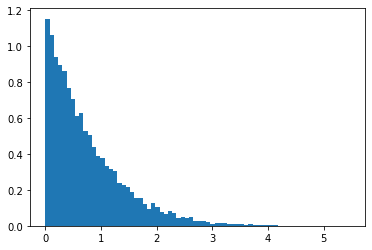

In [206]:
plt.hist(AR_h_V2(n,m,s,l), density=True, bins="auto")
plt.show()

Si l'on veut simuler la loi $f$ selon cette méthode, les paramètres $\mu$ et $\sigma$ restent fixés par l'utilisateur. Seul le paramètre $\lambda$ de la loi de proposition reste variable.


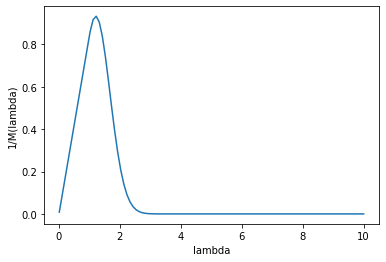

In [231]:
plt.plot(np.linspace(0.01,10,100),[1/M_h(l,m,s) for l in np.linspace(0.01,10,100)])
plt.xlabel("lambda")
plt.ylabel("1/M(lambda)")
plt.show()

Pour maximiser la probabilité d'acceptation $\frac{1}{M(\lambda)}$, on minimise $M(\lambda)$ en $\lambda$.


Une fois $\lambda^* = \underset{\lambda > 0}{\text{argmin}} M(\lambda)$ trouvée, on peut faire varier $\mu$ afin de voir si cette méthode avec la loi de proposition $h$ est meilleure que celle avec la loi de proposition $g$, en particulier pour les $\mu < 0$. Elle est tout le temps meilleure pour les $\mu < 0$  si $\forall \mu < 0,\: \frac{1}{M(\lambda^*)} > 0.5$.